In [2]:
from google.colab import files
uploaded = files.upload()


Saving PlantVillagezip.zip to PlantVillagezip.zip


In [3]:
import zipfile
import os

zip_path = "/content/PlantVillagezip.zip"  # Replace with your exact file name
extract_path = "/content"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted folders
os.listdir(extract_path)


['.config', 'PlantVillage', 'PlantVillagezip.zip', 'sample_data']

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [5]:
img = 256
batch =32

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (img,img),
    batch_size = batch
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

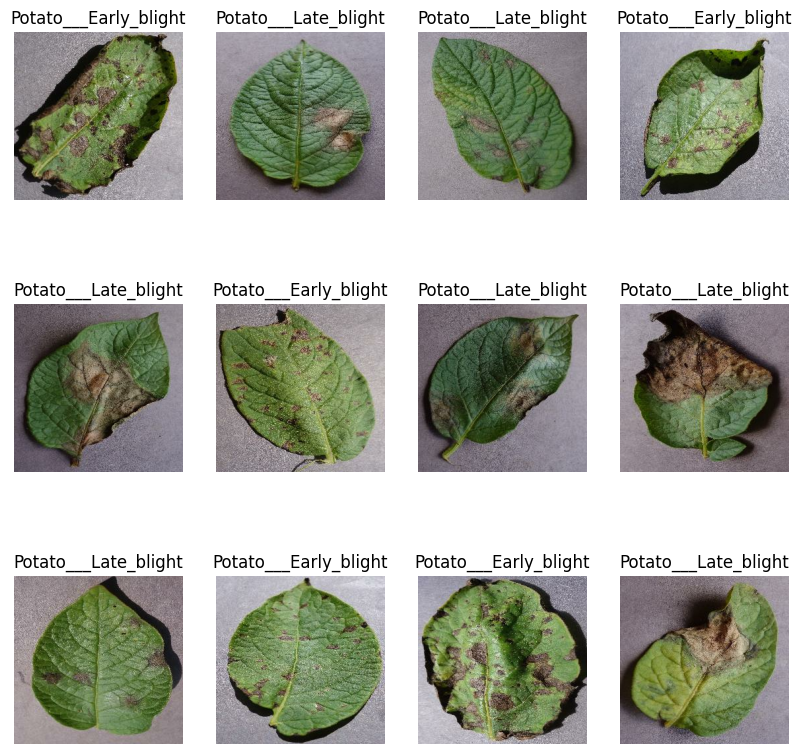

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [10]:
len(dataset)

68

80% -> training \
10% -> validation\
10% -> test

In [11]:
train = 0.8
len(dataset)*train

54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf (ds, train_split =0.8, val_split=0.1, test_split=0.1 , shuffle = True, shuffle_size = 10000):

  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))


54
6
8


In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(img, img),
    layers.Rescaling(1.0/255)
])

In [22]:
data_augumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [29]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(img, img, 3)),
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
])


In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,323 (3.42 MB)

 Trainable params: 896,323 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [35]:
history = model.fit(
    train_ds,
    epochs = 30,
    batch_size = batch,
    validation_data = val_ds,
    verbose = 1
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.6692 - loss: 0.7312 - val_accuracy: 0.8594 - val_loss: 0.4048
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 257s 5s/step - accuracy: 0.8418 - loss: 0.4356 - val_accuracy: 0.8281 - val_loss: 0.4240
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.8627 - loss: 0.3519 - val_accuracy: 0.8802 - val_loss: 0.3460
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.8978 - loss: 0.2634 - val_accuracy: 0.9427 - val_loss: 0.1563
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - accuracy: 0.9384 - loss: 0.1607 - val_accuracy: 0.9271 - val_loss: 0.1525
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 254s 5s/step - accuracy: 0.9475 - loss: 0.1378 - val_accuracy: 0.8906 - val_loss: 0.2475
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.9297 - loss: 0.1903 - val_accuracy: 0.8906 - val_loss: 0.3058
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.9325 - loss: 0.1584 - val_accuracy: 0.8438 - v

In [36]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9505 - loss: 0.1029


In [37]:
scores

[0.1520572453737259, 0.94140625]

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [41]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [44]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

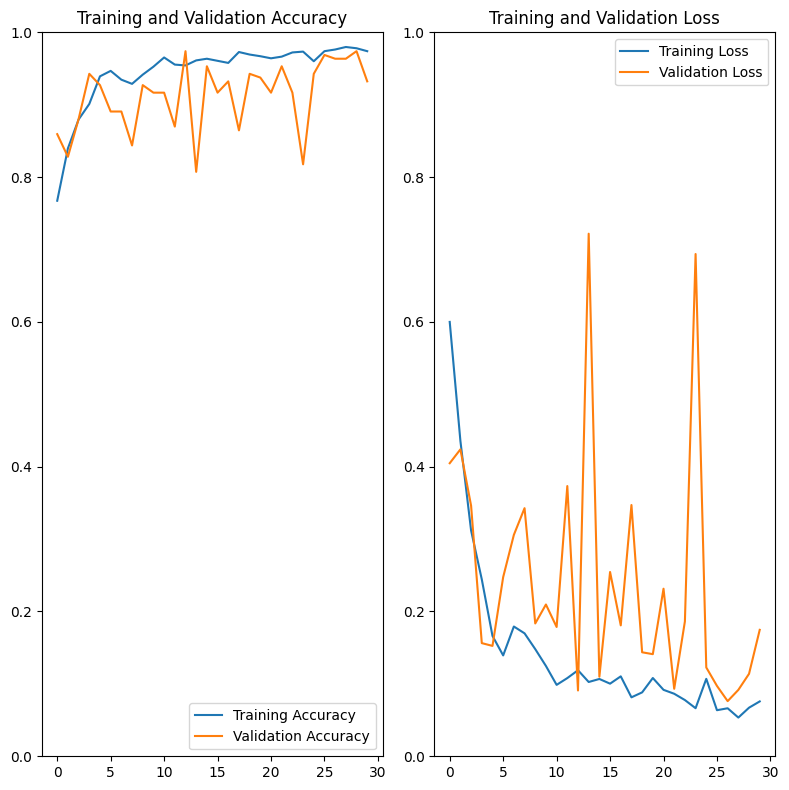

In [57]:
plt.figure(figsize=(8, 8))

# Plot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label="Training Accuracy")
plt.plot(range(30), val_acc, label="Validation Accuracy")
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Plot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label="Training Loss")
plt.plot(range(30), val_loss, label="Validation Loss")
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.tight_layout()
plt.show()


In [50]:
import numpy as np

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___Late_blight


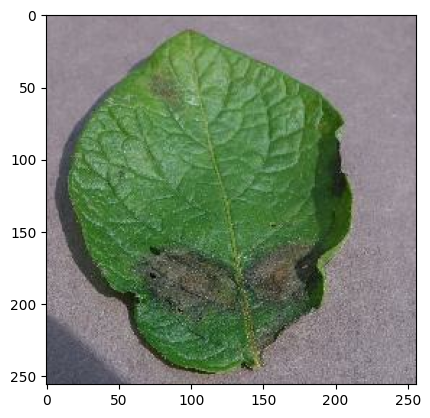

In [51]:
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype("uint8")
  first_label = label_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", class_names[first_label])

  batch_prediction = model.predict(image_batch)
  print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [52]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━

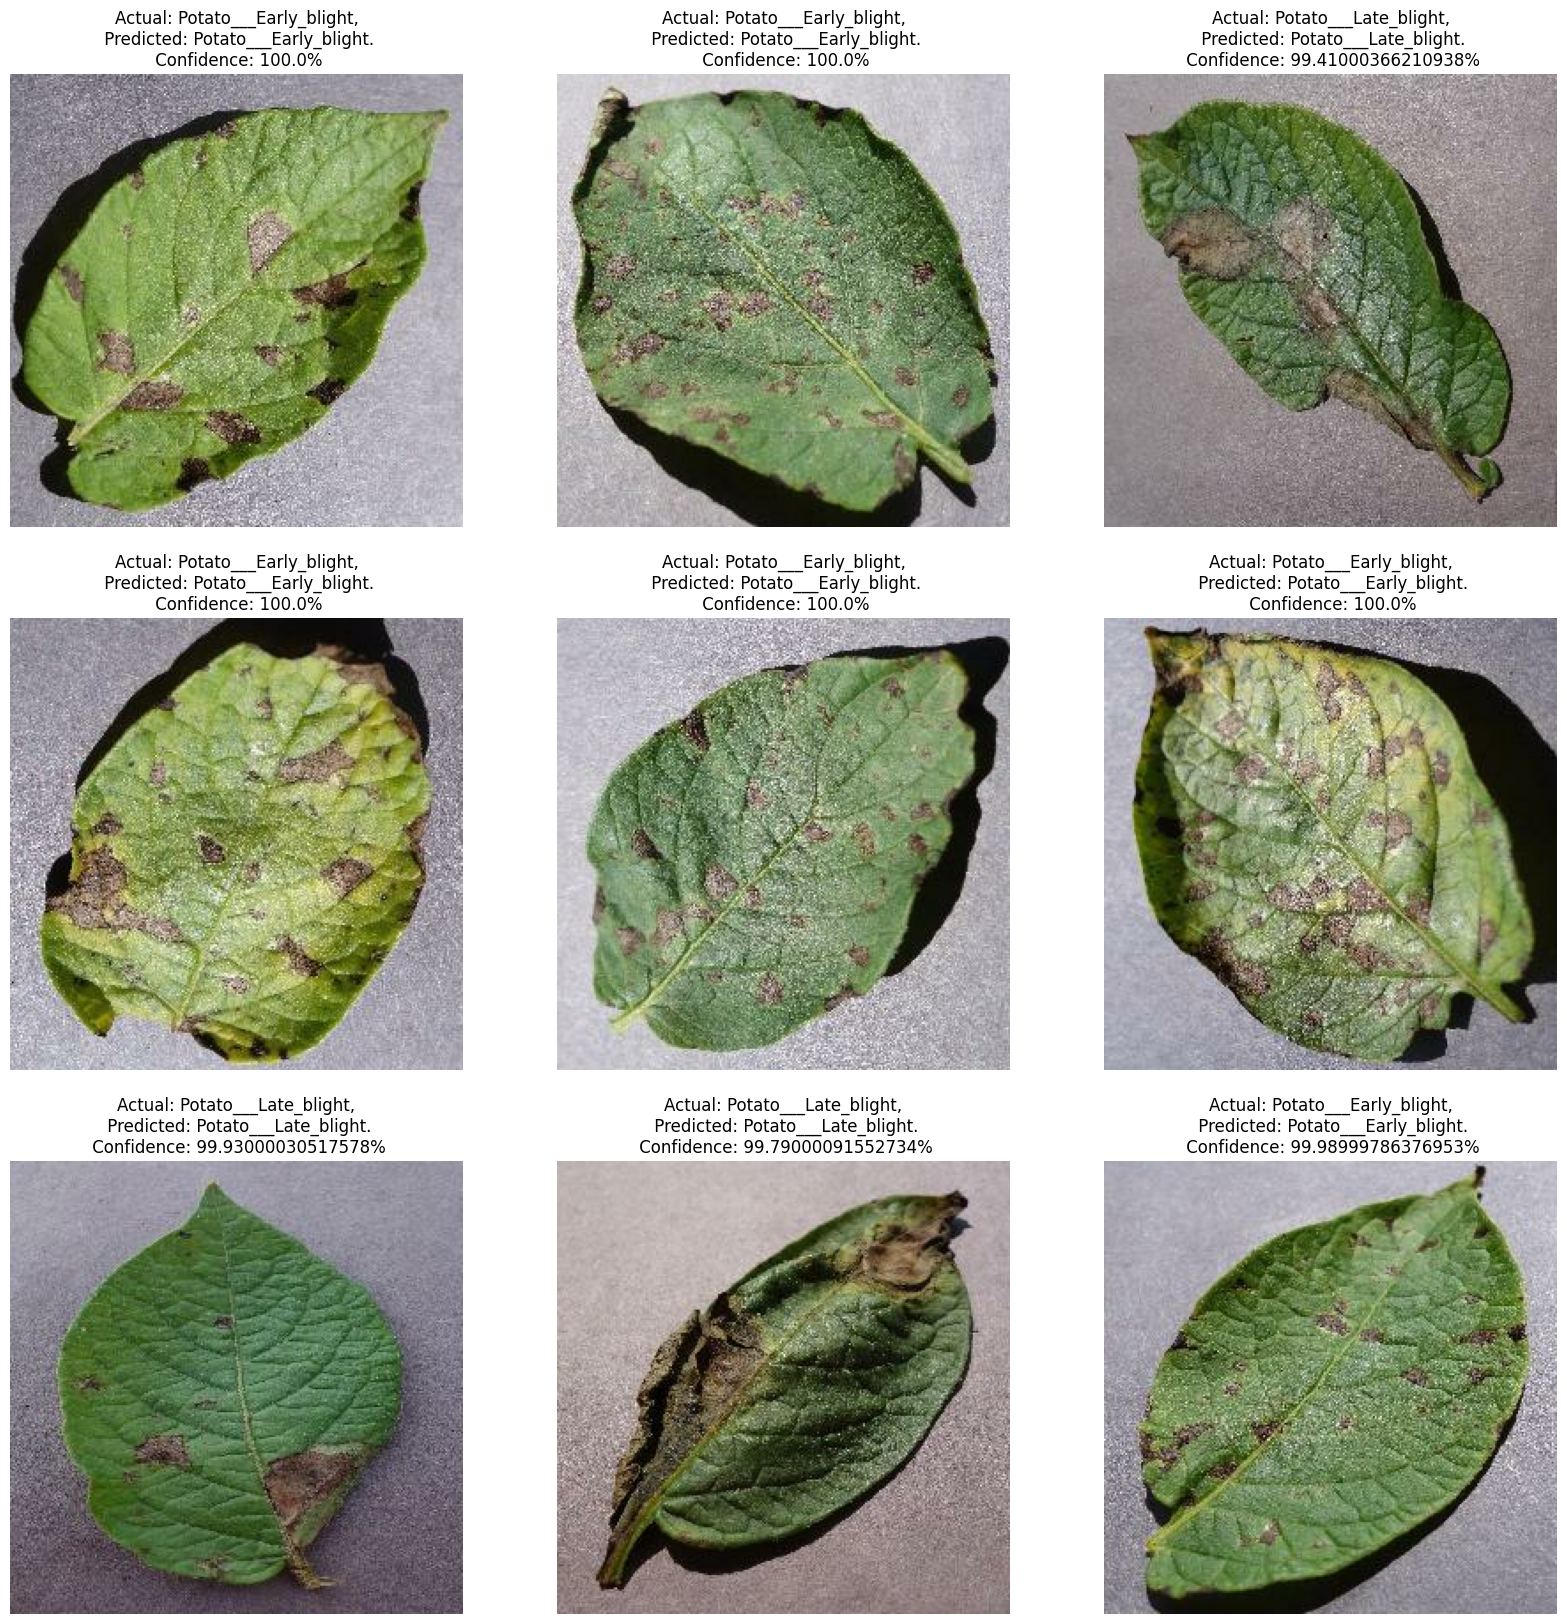

In [58]:
plt.figure(figsize = (20,20))
for images, labels in test_ds.take(3):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")